# Social interactions and the importance of the main characters in The Simpsons

### A point of view by Catalin Vasii

#### I recently came across a post on [Todd Schneider's blog](http://toddwschneider.com/posts/the-simpsons-by-the-data/) with a frequentalist analysis of The Simpsons episode scripts was revealing a pattern of patriarchy. However, counting words does not encapsulate any information on social interactions between the characters. Buster Keaton was silent, yet central in his films. In the following, I used pagerank to reveal these social interactions. In particular, I want to know it a patriarchical social pattern is indeed, present into the cartoon.

#### On [ Wikipedia](https://en.wikipedia.org/wiki/PageRank), PageRank is described as: an algorithm used by Google Search to rank websites in their search engine results. PageRank was named after Larry Page, one of the founders of Google. PageRank is a way of measuring the importance of website pages. According to Google:

#### PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

#### But what else are dialogues, other than links between people? If Lisa answers to Bart, I have regarded this social connection as a link from Bart to Lisa

In [1]:
import numpy as np
import pandas as pd
from __future__ import division
import re
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#### I was able to get the episode scripts  following the instructions on  [this post on Vik Paruchuri's blog](http://www.vikparuchuri.com/blog/figuring-out-which-simpsons-character-is-speaking/)

In [2]:
df = pd.read_json('~/Documents/notebooks/Simpsons/simpsons-scripts/data/raw_scripts.json')

In [3]:
df.head()

,episode_name,script,url
0,,,http://www.snpp.com/episodes/scg.html
1,[9F04] Treehouse of Horror III,\n============================================...,http://www.snpp.com/episodes/9F04.html
2,Itchy and Scratchy: The Movie\n TV Guide Syno...,\nItchy and Scratchy: The Movie\n ...,http://www.snpp.com/episodes/9F03.html
3,Lisa the Beauty Queen ...,\nLisa the Beauty Queen ...,http://www.snpp.com/episodes/9F02.html
4,A Streetcar Named Marge ...,\nA Streetcar Named Marge ...,http://www.snpp.com/episodes/8F18.html


#### Let's take a quick look at one episode script

In [4]:
sample = df.ix[2,1]

In [5]:
print(sample[1223:1500])

Simpson, ``Itchy and Scratchy:  The Movie''
   
    
   Marge: Now be good for Grampa while we're at the parent-teacher meeting.
          We'll bring back dinner.
   Lisa:  What are we gonna have?
   Homer: Well, that depends on what your teachers say.  If you've been
       


#### Notice that the sections with dialogue are separated by three empty rows and also notice the pattern with the name of the character saying each line. We will need these to separate the dialogue sections and then, to extract the characters involved into each such section.
#### We can concatenate the scripts of all the episodes into a string called textData

In [6]:
textData = df['script'].sum()

#### Then use the three new lines pattern to split the string into a list. Our first aim is to have a list with all the dialogue sections

In [7]:
splitpattern = '\n   \n    \n'
lista = textData.split(splitpattern)

Just to be sure we will not have problems with single and double quotations, we remove them. 

In [8]:
def tameString(x):
    x = x.replace('"','')
    x = x.replace("'", "")
    return x

#### We keep only the sections containing the colon mark, since we are only interested in diallogue sections

In [9]:
lista = [tameString(string) for string in lista if ':' in string]

In [10]:
print(lista[25])

   Lisa:  He has the demented melancholy of a Tennessee Williams heroine!
   Homer: Dont you think I know that?
   -- Well, honestly... No, ``Itchy and Scratchy:  The Movie


#### We can see above that this is not enough, so we want to extract the character names into a sublist, using regular expressions, therefore, we are searching for everything that starts with a capital letter, followed by at least one lower case letter, and after zero or more other characters, a colon. We needed the zero or more part of the pattern because of names like Mr. Burns that also contains a space and a dot

In [11]:
pattern = r'[A-Z][a-z]+.*:'

def findLines(x):
    lista = re.findall(pattern,x) 
    return [s.replace(':','') for s in lista]

Let's try how this works:

In [12]:
findLines('\n    Lisa:  He has the demented melancholy of a Tennessee Williams heroine! \
   \n Homer: Dont you think I know that?')

['Lisa', 'Homer']

We can now extract everything that matches the pattern into a sublist, for each dialogue section.

In [13]:
lines = map(findLines, lista)

In [14]:
lines[20:23]

[[u'Snake inspects his haul, ``Itchy and Scratchy'],
 [u'Homer',
  u'Bart',
  u'Itchy and Scratchy',
  u'Homer',
  u'Bart',
  u'Homer',
  u'Itchy and Scratchy'],
 [u'Bart, ``Itchy and Scratchy']]

#### Unfortunately, there are unwanted items. The quickest way to filter only what we need is to manually set a list of the main characters

In [15]:
personaje = set([u'Homer', u'Marge', u'Bart', u'Lisa', u'Grampa', u'Mr. Burns', u'Krusty', \
                u'Moe', u'Skinner', u'Ned'])

and filter all the above sublists:

In [16]:
lines1 = []
for minilist in lines:
    mini = [element for element in minilist if element in personaje]
    lines1.append(mini)

lines1 = [line for line in lines1 if len(line) >= 2] 

#### Now this is a sample of what we have extracted:

In [17]:
print lines1[:3]

[[u'Homer', u'Marge', u'Homer', u'Marge', u'Homer', u'Homer', u'Bart', u'Marge', u'Bart', u'Marge', u'Homer', u'Homer', u'Lisa', u'Homer', u'Lisa', u'Bart', u'Homer', u'Homer', u'Homer', u'Homer', u'Homer', u'Homer', u'Marge', u'Homer', u'Homer', u'Marge', u'Homer', u'Bart', u'Homer', u'Homer', u'Marge', u'Homer', u'Marge', u'Homer', u'Homer', u'Homer', u'Bart', u'Homer', u'Lisa', u'Homer', u'Bart', u'Homer', u'Lisa', u'Bart', u'Marge', u'Marge', u'Marge', u'Marge', u'Marge', u'Marge', u'Marge', u'Homer', u'Marge', u'Marge', u'Ned', u'Bart', u'Bart', u'Bart', u'Bart', u'Bart', u'Bart', u'Lisa', u'Bart', u'Bart', u'Lisa', u'Bart', u'Ned', u'Ned', u'Lisa', u'Homer', u'Bart', u'Homer', u'Lisa', u'Homer', u'Homer', u'Marge', u'Homer', u'Bart', u'Lisa', u'Marge', u'Homer', u'Bart', u'Homer', u'Homer', u'Homer', u'Bart', u'Lisa', u'Bart', u'Lisa', u'Bart', u'Marge', u'Bart', u'Homer'], [u'Marge', u'Lisa', u'Homer', u'Lisa', u'Bart', u'Homer'], [u'Homer', u'Marge', u'Homer']]


#### We will later need a damping parameter for the PageRank, so let's compute it now. It represents the proportion of times the caracters respond to each other within all dialogues and it is computed as $1-(proportion\ of\ new\ dialogues)$ 

In [18]:
flatmap = [item for sublist in lines1 for item in sublist]

# Damping parameter for PageRank
a = 1-(len(lines1)/len(flatmap))
print a

0.794754571704


#### We will also try a personalized PageRank. Do do this, we construct a dictionary with the number of times each character initiates a dialogue

In [19]:
lineStart = [sublist[0] for sublist in lines1]

In [20]:
Personalize = {}
for personaj in personaje:
    Personalize[personaj] = lineStart.count(personaj)

## Social Interactions

#### We can finally now look for social interactions between characters. We are interested in which character is responding to which character in all the dialogue sections. E.g. in the sequence: *u'Homer', u'Marge', u'Homer', u'Marge', u'Homer'*, Merge responds to Homer, then Homer responds to Marge, then Marge to homer again, etc. We want to extract bigrams of the form (u'Homer', u'Marge'),(u'Marge', u'Homer'), (u'Homer', u'Marge'). We can use the nltk library for Natural Language Processing, or do it without any specialized library:

In [21]:
bigrams = []
for lis in lines1:
    for i in range(0,len(lis)-1):
        bigrams.append((lis[i],lis[i+1]))

#### We can have a better look at the bigrams by writing them into a data frame. Let's first create a dataframe with zero values and the characters as index and column names

In [22]:
data = pd.DataFrame(columns = list(personaje), index=list(personaje)).fillna(0)

#### For each bigram (u'Homer', u'Marge'), we will add $1$ to the element on the row Homer and the column Marge, meaning that Marge is responding to Homer:

In [23]:
for element in bigrams:
    if element[0] != element[1]:
        data.ix[element[0],element[1]] =  data.ix[element[0],element[1]] +1

#### The resulting dataframe is:

In [24]:
data

,Homer,Bart,Mr. Burns,Ned,Krusty,Grampa,Marge,Lisa,Moe,Skinner
Homer,0,250,1,24,5,20,312,145,20,3
Bart,261,0,0,7,13,13,78,170,21,8
Mr. Burns,0,0,0,0,0,0,1,0,0,0
Ned,33,2,0,0,0,0,0,3,0,0
Krusty,8,9,0,0,0,0,1,4,0,0
Grampa,21,11,0,0,0,0,1,3,0,0
Marge,380,97,0,2,1,5,0,57,1,0
Lisa,170,192,0,0,4,2,61,0,3,1
Moe,15,18,0,0,2,0,2,5,0,0
Skinner,3,7,0,0,0,0,0,1,1,0


#### We can also construct a dataframe with a stochastic matrix values providing the proportion of time Home is answered by Marge in the line Homer, column Marge

In [25]:
data1 = data.copy()
data1['Sum'] = data1.sum(axis=1)

In [26]:
for pers in personaje:
    data1[pers] = data1[pers] / data1['Sum']

data1.drop('Sum',axis=1, inplace=True)

In [27]:
data1

,Homer,Bart,Mr. Burns,Ned,Krusty,Grampa,Marge,Lisa,Moe,Skinner
Homer,0.000000,0.320513,0.001282,0.030769,0.006410,0.025641,0.400000,0.185897,0.025641,0.003846
Bart,0.457093,0.000000,0.000000,0.012259,0.022767,0.022767,0.136602,0.297723,0.036778,0.014011
Mr. Burns,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Ned,0.868421,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.078947,0.000000,0.000000
Krusty,0.363636,0.409091,0.000000,0.000000,0.000000,0.000000,0.045455,0.181818,0.000000,0.000000
Grampa,0.583333,0.305556,0.000000,0.000000,0.000000,0.000000,0.027778,0.083333,0.000000,0.000000
Marge,0.699816,0.178637,0.000000,0.003683,0.001842,0.009208,0.000000,0.104972,0.001842,0.000000
Lisa,0.392610,0.443418,0.000000,0.000000,0.009238,0.004619,0.140878,0.000000,0.006928,0.002309
Moe,0.357143,0.428571,0.000000,0.000000,0.047619,0.000000,0.047619,0.119048,0.000000,0.000000
Skinner,0.250000,0.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000


#### After we construct a graph with this data:

In [28]:
G=nx.DiGraph()
Edges = [bgm for bgm in bigrams if bgm[0] != bgm[1]]
G.add_edges_from(Edges)

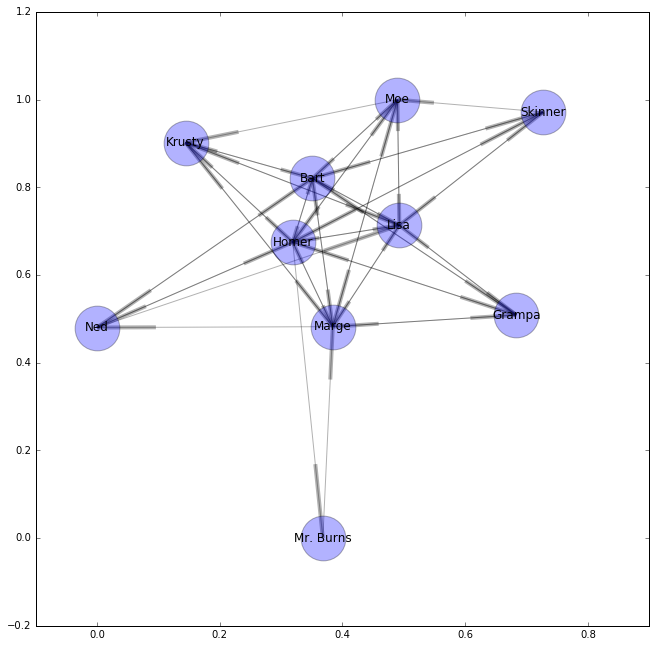

In [29]:
plt.figure(figsize=(11,11))
nx.draw_networkx(G, pos=None, arrows=True, node_size=2000, with_labels=True, node_color='blue', alpha=0.3) 
plt.show()

#### We are  able to apply pagerank:

In [30]:
pagerank = nx.pagerank(G,alpha=a)

In [31]:
rankDF = pd.DataFrame(pagerank,index=[0])
rankDF

,Bart,Grampa,Homer,Krusty,Lisa,Marge,Moe,Mr. Burns,Ned,Skinner
0,0.144315,0.079781,0.145779,0.09448,0.142476,0.139777,0.092479,0.033398,0.063605,0.063911


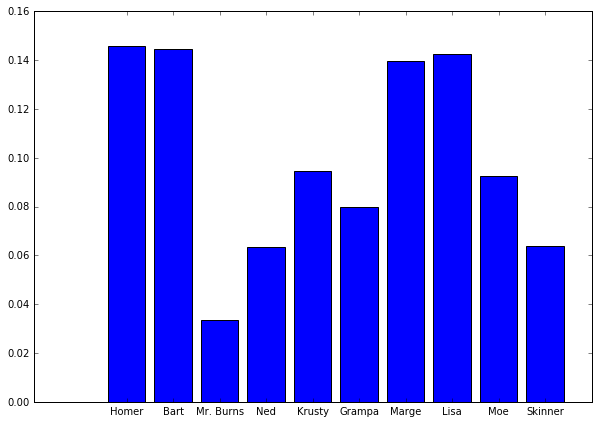

In [32]:
plt.figure(figsize=(10,7))
plt.bar(range(len(pagerank)), pagerank.values(), align='center')
plt.xticks(range(len(pagerank)), pagerank.keys())
plt.show()

#### We can see no patriarchal setting between the characters: Homer, Marge, Bart and Lisa have the same social importance. Krusty the Clown seems to be more important than Moe, but there are many supporting characters we haven't took into account and who Moe's clients.

#### In the end, we can also try a personalized pagerank, considering that when a dialogue ends, the distribution of probability for the character who will initiate a new dialogue is not uniform.

In [33]:
pagerankP = nx.pagerank(G,alpha=a,personalization=Personalize)

In [34]:
rankPersDF = pd.DataFrame(pagerankP,index=[0])
rankPersDF

,Bart,Grampa,Homer,Krusty,Lisa,Marge,Moe,Mr. Burns,Ned,Skinner
0,0.161043,0.068675,0.19584,0.083213,0.146025,0.144425,0.079352,0.017294,0.052818,0.051315


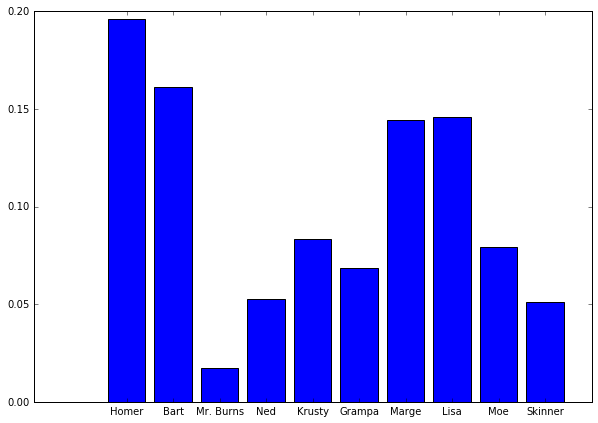

In [35]:
plt.figure(figsize=(10,7))
plt.bar(range(len(pagerankP)), pagerankP.values(), align='center')
plt.xticks(range(len(pagerankP)), pagerankP.keys())
plt.show()

#### Here, the things have changed, at least for Homer. Unsurprisingly, he is the one that spearks without being asked anyting.

feedback is welcome: cvasii23-at-gmail-dot-com. This is still in a draft state